<a href="https://colab.research.google.com/github/Disha-suryawanshi/Datascience/blob/main/ChurnPrediction_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#Import Data Manipulation Libraries
import pandas as pd
import numpy as np

#Import Data Visualization Lirary
import seaborn as sns
import matplotlib.pyplot as plt

# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

# Import Logging
import logging
logging.basicConfig(level=logging.INFO,
                    filename='Model.log',
                    format='%(asctime)s:%(levelname)s - %(message)s',
                    filemode='w',
                    force = True)

# Importing Scikit Learn Libraries
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
logging.info('Data Ingestion Process Begings....')

In [59]:
#  Import Dataset Using Pandas Functions
df = pd.read_csv('Churn_Modelling.csv',sep = ',')
df.sample(frac=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
180,181,15716334,Rozier,850,Spain,Female,45.0,2,122311.21,1,1.0,1.0,19482.50,0
4514,4515,15658670,Chien,669,France,Female,38.0,8,0.00,2,1.0,0.0,84049.16,0
8140,8141,15572022,Han,605,France,Female,36.0,6,0.00,1,0.0,1.0,690.84,0
9726,9727,15662494,Goliwe,773,Spain,Male,43.0,7,138150.57,1,1.0,1.0,177357.16,0
3185,3186,15761950,Woronoff,652,Germany,Female,45.0,9,110827.49,1,1.0,1.0,153383.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,15780961,Cavenagh,735,France,Female,21.0,1,178718.19,2,1.0,0.0,22388.00,0
295,296,15723654,Tsao,773,France,Male,25.0,2,135903.33,1,1.0,0.0,73656.38,0
8607,8608,15643215,Jen,602,Germany,Male,38.0,2,71667.97,2,0.0,0.0,137111.89,0
9654,9655,15773098,Ch'in,834,Spain,Male,34.0,5,0.00,2,0.0,0.0,53437.10,0


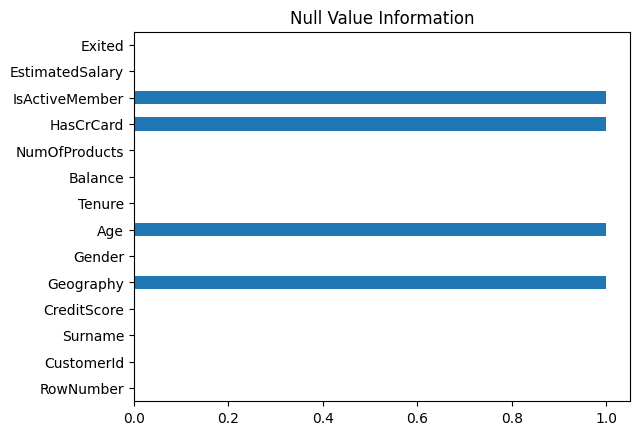

In [60]:
#Checking the dataset
df.isnull().sum().plot(kind='barh')
plt.title('Null Value Information')
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [62]:
# Imputing with mean/median/mode/contant value :
df['Geography'].mode()
df['Geography'] = df['Geography'].fillna('France', inplace = False)
df['Age'] = df['Age'].fillna(df['Age'].median(),inplace = False)
df['HasCrCard'] = df['HasCrCard'].fillna(df['HasCrCard'].median(),inplace = False)
df['IsActiveMember'] = df['IsActiveMember'].fillna(df['IsActiveMember'].median(),inplace = False)


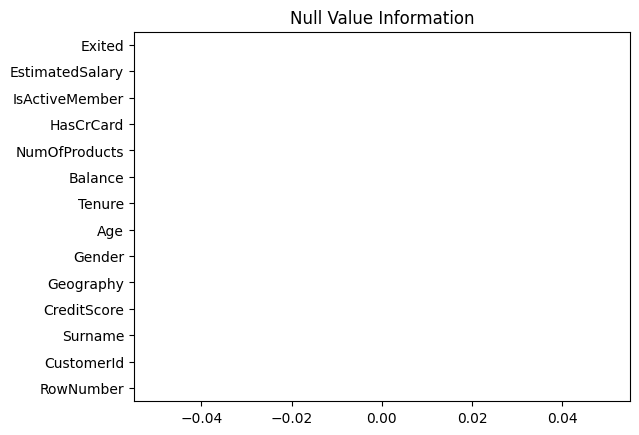

In [63]:
#Checking the dataset
df.isnull().sum().plot(kind='barh')
plt.title('Null Value Information')
plt.show()

In [64]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [65]:
# Pre-processing
# Split the dataset
categorical_col = df.select_dtypes(include = 'object')
categorical_col

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9997,Liu,France,Female
9998,Sabbatini,Germany,Male
9999,Sabbatini,Germany,Male
10000,Walker,France,Female


In [66]:
# Split the dataset
numerical_col = df.select_dtypes(exclude = 'object')
numerical_col

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,699,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,850,43.0,2,125510.82,1,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,709,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

In [68]:
# Step 1 : Split the data into x and y
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname','Exited'],axis=1)
y = df['Exited']

In [69]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [70]:
# Step 2 : Split the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [71]:
# Step 3 : Use Scaling Technique
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
# Model Bulding
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
accuracy_score(y_test,y_pred_LR)

0.80973008997001

<Axes: xlabel='Exited'>

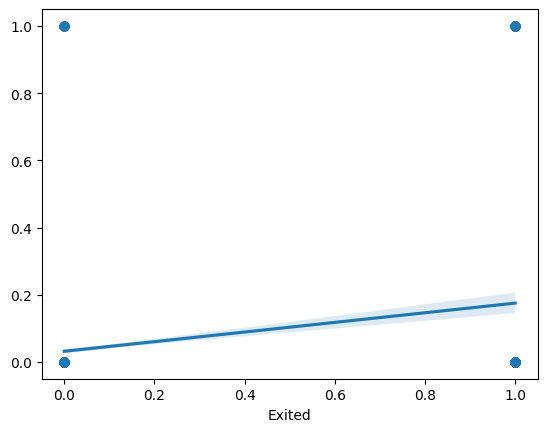

In [73]:
sns.regplot(x=y_test,y=y_pred_LR)